<a href="https://colab.research.google.com/github/MOR1968/Exploratory-Data-Analysis/blob/main/analysexploradonnee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
df = pd.read_csv("usedcars.csv", header=0)

In [5]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


###  Verification des Types de variable
il est important de comprendre d’abord de quel type de variable il s’agit. Cela nous aidera à trouver la méthode de visualisation la plus appropriée pour cette variable.

In [6]:
# liste les types de variables pour chaque colonne
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [ ]:
df['peak-rpm'].dtypes

dtype('float64')

Par exemple nous pouvons calculer la correlation entre les variables de types int64 et float64 en utilisant la methode corr()

In [7]:
# Selectionnons seulement les variables numeriques
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Trouvez la corrélation entre les colonnes suivantes : bore, stroke, compression-ratio et horsepower.

Astuce : si vous souhaitez sélectionner ces colonnes, utilisez la syntaxe suivante :
df[['bore','stroke','compression-ratio','horsepower']]

In [8]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


**bore et stroke** : La corrélation est de -0.055390, ce qui est très proche de 0. Cela indique une très faible corrélation linéaire entre le bore et le stroke.

**bore et compression-ratio** : La corrélation est de 0.001263, également très proche de 0. Cela indique une très faible corrélation linéaire entre le bore et le taux de compression.

**bore et horsepower** : La corrélation est de 0.566936. C'est une corrélation modérée positive. Cela suggère qu'à mesure que le bore augmente, la puissance (horsepower) a tendance à augmenter également.

***stroke et compression-ratio ***: La corrélation est de 0.187923, ce qui est une corrélation faible positive.

**stroke et horsepower** : La corrélation est de 0.098462, ce qui est une corrélation très faible positive.
compression-ratio et horsepower : La corrélation est de -0.214514. C'est une

**corrélation faible négative**. Cela suggère qu'à mesure que le taux de compression augmente, la puissance (horsepower) a tendance à légèrement diminuer.

### Relation linéaire positive

(0.0, 53204.32586431289)

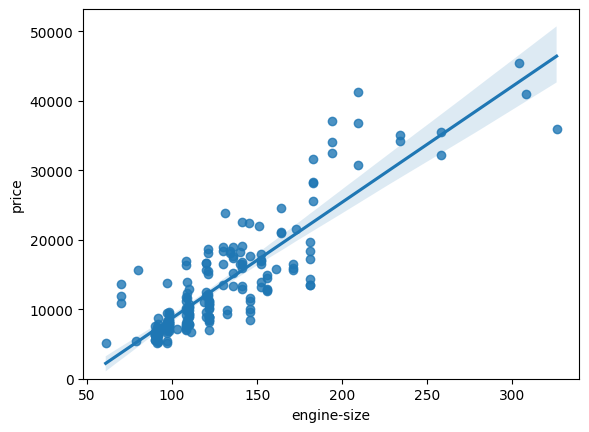

In [9]:
# engine-size comme variable prédictive potentielle du prix
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

Lorsque la taille du moteur augmente, le prix augmente : cela indique une corrélation directe positive entre ces deux variables. La taille du moteur semble être un très bon prédicteur du prix puisque la droite de régression est presque une ligne diagonale parfaite.

Nous pouvons examiner la corrélation entre engine-size et price et constater qu’elle est d’environ 0,87.

In [10]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


La consommation sur autoroute (highway mpg) est une variable prédictive potentielle du prix. Traçons le nuage de points (scatterplot) de highway-mpg et price.

<Axes: xlabel='highway-mpg', ylabel='price'>

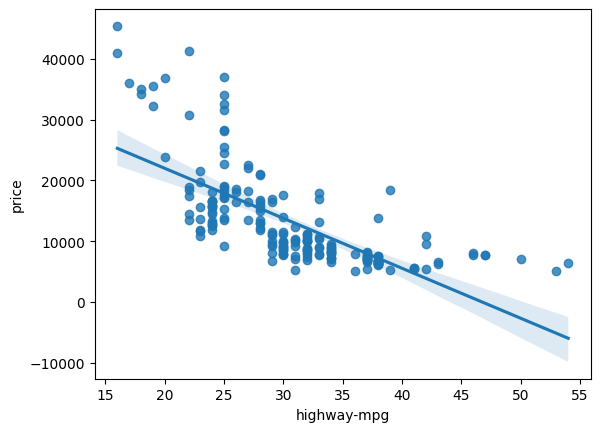

In [11]:
sns.regplot(x="highway-mpg", y="price", data=df)

Lorsque la consommation sur autoroute (highway-mpg) augmente, le prix diminue : cela indique une relation inverse/négative entre ces deux variables. La consommation sur autoroute pourrait potentiellement être un prédicteur du prix.

Nous pouvons examiner la corrélation entre highway-mpg et price et constater qu’elle est d’environ -0,704.

In [12]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


### Relation linéaire faible


Voyons si peak-rpm est une variable prédictive de price.

<Axes: xlabel='peak-rpm', ylabel='price'>

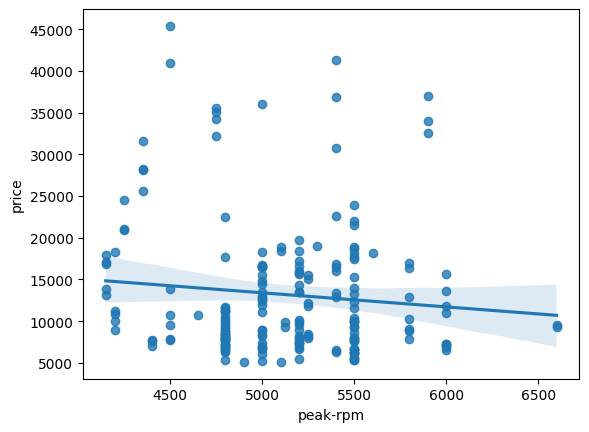

In [13]:
sns.regplot(x="peak-rpm", y="price", data=df)

<Axes: xlabel='peak-rpm', ylabel='price'>

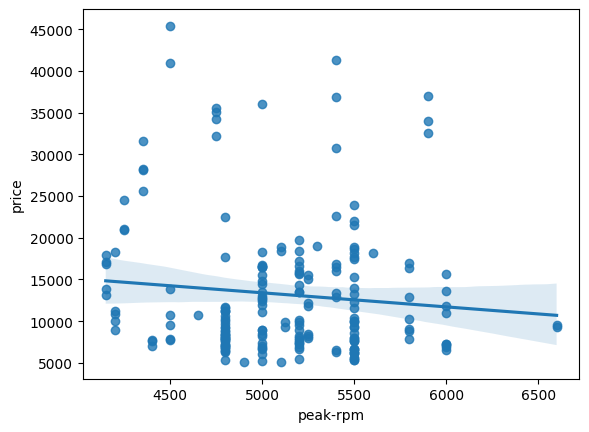

In [14]:
sns.regplot(x="peak-rpm", y="price", data=df)

Peak-rpm ne semble pas du tout être un bon prédicteur du prix, puisque la droite de régression est presque horizontale. De plus, les points de données sont très dispersés et loin de la droite ajustée, montrant beaucoup de variabilité. Par conséquent, ce n’est pas une variable fiable.

Nous pouvons examiner la corrélation entre peak-rpm et price et constater qu’elle est d’environ -0,101616.

In [15]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [ ]:
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


Étant donné les résultats de corrélation entre price et stroke, t’attends-tu à une relation linéaire ?

<Axes: xlabel='stroke', ylabel='price'>

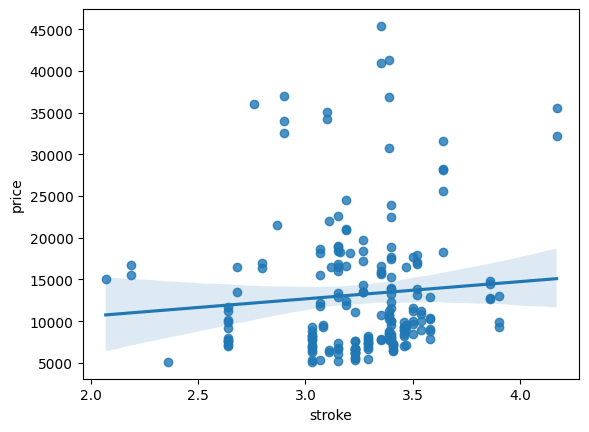

In [16]:
sns.regplot(x="stroke", y="price", data=df)

stroke ne semble pas du tout être un bon prédicteur du prix

**Variables catégorielles**

Ce sont des variables qui décrivent une "caractéristique" d’une unité de données, et qui sont choisies parmi un petit groupe de catégories.

Voyons la relation entre body-style et price.

<Axes: xlabel='body-style', ylabel='price'>

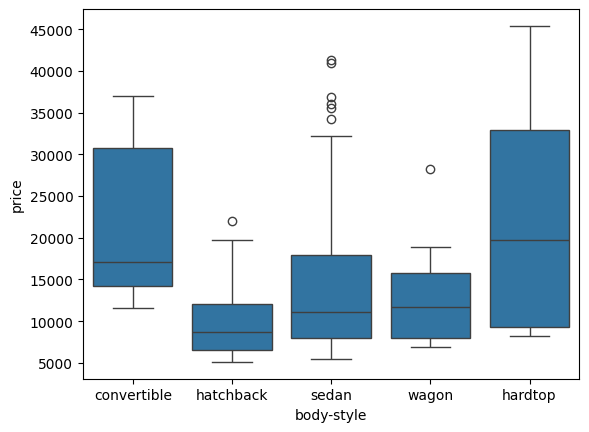

In [17]:
sns.boxplot(x="body-style", y="price", data=df)

Nous voyons que les distributions des prix entre les différentes catégories de body-style se chevauchent beaucoup, donc body-style ne serait pas un bon prédicteur du prix. Voyons maintenant la relation entre engine-location et price :

<Axes: xlabel='engine-location', ylabel='price'>

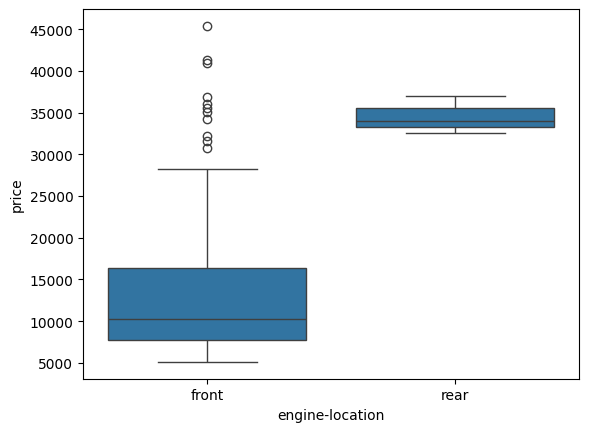

In [18]:
sns.boxplot(x="engine-location", y="price", data=df)

Ici, nous voyons que la distribution des prix entre ces deux catégories de engine-location, front et rear, est suffisamment distincte pour considérer engine-location comme un bon prédicteur potentiel du prix.

Examinons la relation entre drive-wheels et price.

<Axes: xlabel='drive-wheels', ylabel='price'>

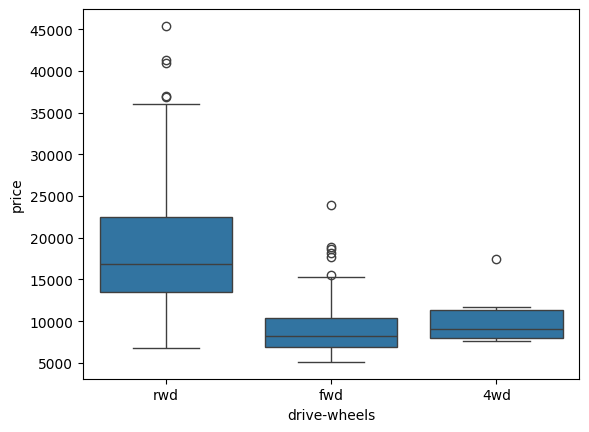

In [19]:
sns.boxplot(x="drive-wheels", y="price", data=df)

Ici, nous voyons que la distribution des prix entre les différentes catégories de drive-wheels est différente. Ainsi, drive-wheels pourrait potentiellement être un prédicteur du prix

**Analyse Statistique Descriptive**

La fonction describe calcule automatiquement les statistiques de base pour toutes les variables continues. Toute valeur manquante (NaN) est automatiquement ignorée dans ces statistiques.

Cela affichera :

le nombre d’observations de la variable (count)

la moyenne (mean)

l’écart-type (std)

la valeur minimale (min)

l’IQR (Intervalle interquartile : 25 %, 50 % et 75 %)

la valeur maximale (max)

Appliquons le avec describe

In [20]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


Le paramétrage par défaut de describe ignore les variables de type object.
Nous pouvons appliquer la méthode describe sur les variables de type object de la manière suivante

In [21]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


Explication des valeurs pour un object :

count → nombre total de valeurs non manquantes

unique → nombre de valeurs uniques différentes

top → la valeur la plus fréquente (le mode)

freq → la fréquence (nombre d’occurrences) de cette valeur la plus fréquente

### **Value Counts**
La méthode **value_counts** est un bon moyen de comprendre combien d’unités nous avons pour chaque caractéristique/variable.

Nous pouvons appliquer la méthode value_counts sur la colonne drive-wheels.
N’oubliez pas que la méthode **value_counts** ne fonctionne que sur une série pandas (pandas Series), et non sur un dataframe pandas.

Par conséquent, on utilise une seule paire de crochets **df['drive-wheels']** et non deux paires de crochets **df[['drive-wheels']]**.

In [22]:
df['drive-wheels'].value_counts()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Nous pouvons convertir la **Series** en **DataFrame** de la manière suivante :

In [23]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Répétons les étapes ci-dessus mais en enregistrant les résultats dans le DataFrame drive_wheels_counts et en renommant la colonne 'drive-wheels' en 'value_counts'.

In [25]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.reset_index(inplace=True)
drive_wheels_counts=drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'})
drive_wheels_counts


,value_counts,count
0,fwd,118
1,rwd,75
2,4wd,8


Maintenant, renommons l’index en 'drive-wheels' :

In [26]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts,count
drive-wheels,,
0,fwd,118
1,rwd,75
2,4wd,8


Nous pouvons répéter le processus ci-dessus pour la variable 'engine-location'.

In [27]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


Après avoir examiné les value counts de la localisation du moteur, nous constatons que la localisation du moteur ne serait pas une bonne variable prédictive pour le prix.

En effet, nous n’avons que trois voitures avec un moteur arrière et 198 avec un moteur avant, donc ce résultat est biaisé.

# **Notions de base sur le regroupement (Grouping)**



La méthode groupby regroupe les données selon différentes catégories. Les données sont regroupées en fonction d’une ou plusieurs variables, et une analyse est effectuée sur chaque groupe individuellement.

Par exemple, regroupons par la variable "drive-wheels". On constate qu’il existe 3 catégories différentes de type de transmission.

In [28]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Si nous voulons savoir, en moyenne, quel type de transmission est le plus précieux, nous pouvons regrouper par "drive-wheels" puis calculer la moyenne.

Nous pouvons sélectionner les colonnes 'drive-wheels', 'body-style' et 'price', puis les assigner à la variable df_group_one.

In [30]:
df_group_one = df[['drive-wheels','body-style','price']]

Nous pouvons ensuite calculer le prix moyen pour chacune des différentes catégories de données.

In [31]:
# grouping results
df_grouped = df_group_one.groupby(['drive-wheels'], as_index=False).agg({'price': 'mean'})
df_grouped

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


D’après nos données, il semble que les véhicules à **traction arrière** soient, en moyenne, les plus chers, tandis que les véhicules à **quatre roues motrices** et à **traction avant** ont un prix à peu près similaire.

Il est également possible de **regrouper par plusieurs variables**. Par exemple, regroupons à la fois par **drive-wheels** et **body-styl**e. Cela permet de **regrouper le dataframe selon la combinaison unique** de **drive-wheels** et **body-style**. Nous pouvons **stocker les résultats** dans la variable **grouped_test1**.


In [32]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Ces données regroupées sont beaucoup plus faciles à visualiser lorsqu’elles sont transformées en **tableau croisé dynamique**. Un **tableau croisé dynamique** est similaire à une feuille Excel, avec une variable en colonnes et une autre en lignes. Nous pouvons convertir le dataframe en **tableau croisé dynamique** en utilisant la méthode pivot pour créer un tableau croisé à partir des groupes.

Dans ce cas, nous laisserons la variable drive-wheels comme lignes du tableau, et nous ferons pivoter body-style pour qu’elle devienne les colonnes du tableau

In [33]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222





Souvent, nous n’aurons pas de données pour certaines cellules du tableau croisé dynamique. Nous pouvons **remplir ces cellules manquantes avec la valeur 0**, mais toute autre valeur pourrait également être utilisée. Il convient de mentionner que **les données manquantes sont un sujet assez complexe** et constituent un cours à part entière(voir le miniprojet github sur data wranging que j'avais fait) .


In [38]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Utilisez la fonction groupby pour trouver le prix moyen de chaque voiture en fonction de son type de carrosserie (body-style).

In [39]:
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


Si vous n’avez pas importé pyplot, faisons-le à nouveau :

In [ ]:
#import matplotlib.pyplot as plt
#%matplotlib inline

Variables : Drive Wheels et Body Style vs. Price

Utilisons une carte thermique (heat map) pour visualiser la relation entre Body Style et Price.


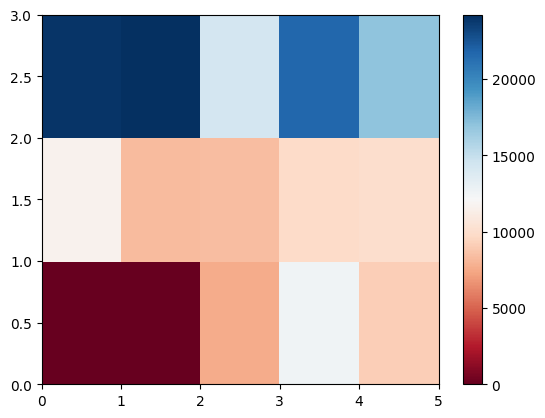

In [40]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

La carte de chaleur (heatmap) représente la variable cible (price) proportionnellement à la couleur, en fonction des variables 'drive-wheel' et 'body-style' sur les axes vertical et horizontal, respectivement. Cela nous permet de visualiser comment le prix est lié à 'drive-wheel' et 'body-style'.

Les étiquettes par défaut ne nous apportent aucune information utile. Modifions-les :

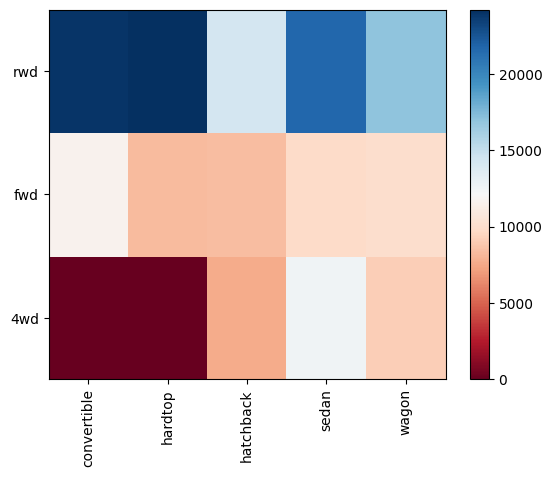

In [41]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

La visualisation est très importante en science des données, et les bibliothèques de visualisation Python offrent une grande liberté. Nous approfondirons ce sujet dans un cours séparé sur les visualisations en Python.

La question principale que nous voulons répondre dans ce module est : « Quelles sont les principales caractéristiques qui ont le plus d’impact sur le prix des voitures ? »

Pour obtenir une meilleure mesure des caractéristiques importantes, nous examinons la corrélation de ces variables avec le prix des voitures. En d’autres termes : comment le prix de la voiture dépend-il de cette variable ?

**Corrélation et Causalité**

**Corrélation** : une mesure de l’étendue de l’interdépendance entre les variables.

**Causalité **: la relation de cause à effet entre deux variables.

Il est important de connaître la différence entre ces deux notions. La corrélation n’implique pas la causalité. Déterminer la corrélation est beaucoup plus simple que de déterminer la causalité, car la causalité peut nécessiter des expérimentations indépendantes.

**Corrélation de Pearson**

La corrélation de Pearson mesure la dépendance linéaire entre deux variables X et Y.

Le coefficient résultant est une valeur comprise entre -1 et 1, où :

*  1 : Corrélation linéaire positive parfaite.

*  0 : Aucune corrélation linéaire, les deux variables n’influencent probablement pas l’une l’autre.

*  -1 : Corrélation linéaire négative parfaite.

**La corrélation de Pearson** est la méthode par défaut de la fonction corr. Comme précédemment, nous pouvons calculer la corrélation de Pearson des variables de type int64 ou float64.

In [42]:
df.select_dtypes(include=['number']).corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Parfois, nous souhaitons connaître la signification statistique de l’estimation de la corrélation.

**P-value**

Qu’est-ce que la valeur p ? La valeur p est la probabilité que la corrélation entre ces deux variables soit statistiquement significative. Normalement, on choisit un niveau de signification de 0,05, ce qui signifie que nous sommes 95 % confiants que la corrélation entre les variables est significative.

Par convention :

**p-value** ≤ 0,001 : il existe une forte preuve que la corrélation est significative.

**p-value** ≤ 0,05 : il existe une preuve modérée que la corrélation est significative.

**p-value** ≤ 0,1 : il existe une faible preuve que la corrélation est significative.

**p-value** > 0,1 : il n’y a aucune preuve que la corrélation est significative.

Nous pouvons obtenir ces informations en utilisant le module stats de la bibliothèque scipy.

In [43]:
from scipy import stats

(Wheel-Base) vs. Prix (Price)
**texte en gras**
Calculons le coefficient de corrélation de Pearson et la valeur p (P-value) entre wheel-base et price.

In [44]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("Le coefficient de corrélation de Pearson est", pearson_coef, "avec une valeur p de P =", p_value)

Le coefficient de corrélation de Pearson est 0.584641822265508 avec une valeur p de P = 8.076488270732947e-20


**Conclusion :**

Puisque la valeur p ≤ 0,001, la corrélation entre wheel-base et price est statistiquement significative, bien que la relation linéaire ne soit pas extrêmement forte (~0,585).

Puissance (Horsepower) vs. Prix (Price)

Calculons le coefficient de corrélation de Pearson et la valeur p (P-value) entre horsepower et price.

In [46]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("Le coefficient de corrélation de Pearson est", pearson_coef, "avec une valeur p de P =", p_value)

Le coefficient de corrélation de Pearson est 0.8095745670036562 avec une valeur p de P = 6.369057428259571e-48


Puisque la valeur p ≤ 0,001, la corrélation entre horsepower et price est statistiquement significative, et la relation linéaire est assez forte (~0,809, proche de 1).

**Longueur (Length) vs. Prix (Price)**

Calculons le coefficient de corrélation de Pearson et la valeur p (P-value) entre length et price.

In [47]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("Le coefficient de corrélation de Pearson est", pearson_coef, "avec une valeur p de P =", p_value)

Le coefficient de corrélation de Pearson est 0.6906283804483639 avec une valeur p de P = 8.016477466159241e-30


Conclusion :

Puisque la valeur p ≤ 0,001, la corrélation entre length et price est statistiquement significative, et la relation linéaire est modérément forte (~0,691).

**Largeur (Width) vs. Prix (Price)**

Calculons le **coefficient de corrélation de Pearson** et la **valeur p (P-value)** entre **width** et **`price** :


In [48]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("Le coefficient de corrélation de Pearson est", pearson_coef, "avec une valeur p de P =", p_value)

Le coefficient de corrélation de Pearson est 0.7512653440522675 avec une valeur p de P = 9.200335510480637e-38


Conclusion :

Puisque la valeur p < 0,001, la corrélation entre width et price est statistiquement significative, et la relation linéaire est assez forte (~0,751).

Poids à vide (Curb-Weight) vs. Prix (Price)

Calculons le coefficient de corrélation de Pearson et la valeur p (P-value) entre curb-weight et price :

In [49]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("Le coefficient de corrélation de Pearson est", pearson_coef, "avec une valeur p de P =", p_value)

Le coefficient de corrélation de Pearson est 0.8344145257702844 avec une valeur p de P = 2.1895772388939584e-53


Conclusion :

Puisque la valeur p ≤ 0,001, la corrélation entre curb-weight et price est statistiquement significative, et la relation linéaire est assez forte (~0,834).

**Taille du moteur (Engine-Size) vs. Prix (Price)**

Calculons le coefficient de corrélation de Pearson et la valeur p (P-value) entre engine-size et price :

In [52]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("Le coefficient de corrélation de Pearson est", pearson_coef, "avec une valeur p de P =", p_value)

Le coefficient de corrélation de Pearson est 0.8723351674455184 avec une valeur p de P = 9.265491622198827e-64


Conclusion :

Puisque la valeur p ≤ 0,001, la corrélation entre engine-size et price est statistiquement significative, et la relation linéaire est très forte (~0,872).

**Alésage (Bore) vs. Prix (Price)**

Calculons le coefficient de corrélation de Pearson et la valeur p (P-value) entre bore et price :

In [51]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("Le coefficient de corrélation de Pearson est", pearson_coef, "avec une valeur p de P =", p_value)

Le coefficient de corrélation de Pearson est 0.5431553832626603 avec une valeur p de P = 8.049189483935246e-17


Conclusion :

Puisque la valeur p ≤ 0,001, la corrélation entre bore et price est statistiquement significative, mais la relation linéaire n’est que modérée (~0,521).

Nous pouvons appliquer le même processus pour city-mpg et highway-mpg :

**Consommation en ville (City-mpg) vs. Prix (Price)**

In [55]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("Le coefficient de corrélation de Pearson est", pearson_coef, "avec une valeur p de P =", p_value)

Le coefficient de corrélation de Pearson est -0.686571006784468 avec une valeur p de P = 2.3211320655674997e-29


Conclusion :

Puisque la valeur p ≤ 0,001, la corrélation entre city-mpg et price est statistiquement significative, et le coefficient d’environ -0,687 montre que la relation est négative et modérément forte.

**Highway-mpg vs. Price**

In [56]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print("Le coefficient de corrélation de Pearson est", pearson_coef, "avec une valeur p de P =", p_value)

Le coefficient de corrélation de Pearson est -0.7046922650589531 avec une valeur p de P = 1.7495471144475605e-31


Conclusion :

Puisque la valeur p < 0,001, la corrélation entre highway-mpg et price est statistiquement significative, et le coefficient d’environ -0,705 montre que la relation est négative et modérément forte.

**Conclusion : Variables importantes**

Nous avons maintenant une meilleure idée de nos données et des variables importantes à prendre en compte lors de la prédiction du prix des voitures. Nous les avons limitées aux variables suivantes :

Variables numériques continues :

Length (Longueur)

Width (Largeur)

Curb-weight (Poids à vide)

Engine-size (Taille du moteur)

Horsepower (Puissance)

City-mpg (Consommation en ville)

Highway-mpg (Consommation sur route)

Wheel-base (Empattement)

Bore (Alésage)

Variables catégorielles :

Drive-wheels (Type de transmission)

À présent, en passant à la construction de modèles d’apprentissage automatique pour automatiser notre analyse, alimenter le modèle avec des variables qui influencent significativement notre variable cible permettra d’améliorer les performances de prédiction du modèle.